# MPA-MLF, Lab 2 - K-means

K-means is one of the most popular unsupervised machine learning algorithms, well known for its simplicity. This algorithm aims to separate unlabeled data into different clusters(subgroups) with the number of clusters represented by the variable *K*. Data points in the same cluster are very similar, while data points in different clusters are very different. The similarity of data is based on some similarity metric, where the similarity metric can be distance-based, correlation-based, etc. 

In our case, we will use distance-based metrics. Any distance-based metrics for numeric variables can be employed, for example: 
 - Euclidean distance
 - Manhattan distance
 - Cosine similarity


There is an example how K-means works:

1. Imagine you have a bunch of dots scattered on a piece of paper. These dots represent data points, and the goal of the k-means algorithm is to group similar dots into clusters

2. To start, you randomly select *k* dots from the scatter plot and assign each one to be the center of a cluster. These *k* dots are called centroids.

3. Then, you calculate the distance between each dot and each centroid and assign each dot to the closest centroid, effectively grouping the dots into k clusters.

4. Next, you recalculate the centroid of each cluster by finding the average position of all the dots in that cluster.

5. Repeat steps 3 and 4 until the centroids no longer change, meaning the clusters have stabilized.

6. Finally, the algorithm outputs the k clusters and the corresponding centroids.


In our case, we would use a Euclidian distance as a metric. Mathematically speaking, the goal would be to minimalize the following objective function:

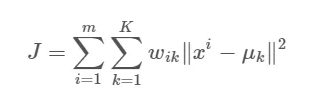

where: 
   - *k* represents number of clusters (groups)
   - *m* represents number of points
   - u_k represents centroids
   - x_i represents data point
   - w_ik represents weight where wik=1 for data point xi if it belongs to cluster k; otherwise, wik=0.

There are some typical applications of using k-means:
- Customer Segmentation: k-means can segment customers based on their demographic information or purchase behavior. This information can then be used for targeted marketing or to improve the customer experience.

- Image Compression: k-means can reduce the number of colors in an image while preserving its visual quality. This is done by replacing similar color pixels with a single color, thereby reducing the amount of data required to represent the image.

- Anomaly Detection: k-means can be used to identify outliers or anomalies in a dataset by clustering similar data points and identifying data points far from the centroids of their respective clusters.

- Document Clustering: k-means can cluster documents based on their content, for example, to group news articles by topic or categorize customer support tickets.

- Market Segmentation: k-means can be used to segment a market based on customer characteristics, such as age, income, or spending habits, in order to identify subgroups of customers with similar needs or preferences.


Recomended sources:
 - https://towardsdatascience.com/log-book-guide-to-distance-measuring-approaches-for-k-means-clustering-f137807e8e21
 - https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
 - https://realpython.com/k-means-clustering-python/
 - https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875
 - https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Exercise 1 - K-means from scratch

## Implementing K-means

In this exercise, the task would be to implement a simple k-means algorithm from scratch, as described above. Let's rewrite the steps to be more readily implementable

### Steps:
  1. Specify the number of clusters *K*
  2. initialize centroids
  3. calculate the distance from centroids to all points in datasets
  4. assign data points to the closest centroids
  5. calculate objective function
  6. compute new centroids to the clusters by taking the average of all data points that belong to each cluster
  7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached


Tips: 
- Try to avoid using loops what if it is not necessary, instead of using loops, use numpy functions. There is a list of numpy functions that you might find usefull:
    - np.argmin()
    - np.where()
    - np.transpose()
    - np.random.permutation()
    - np.random.schuffle()
    - np.linalg.norm()
    - np.arange()
    - np.split()
    - np.random.choice()


- Since the initial clusters are selected randomly, so the algorithm can lead to different results each time its runned. To obtain the best results, it is helpful to run the algorithm multiple times and select result with the lowest objective function


### Code

**Please note that the code structure provided below is only a recommendation. If you prefer, you can use your own code structure. If you are familiar with OOP, you can also use it. However, writing your code in one function or not using functions at all is not the recommended approach**

In [70]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

### 0. Load dataset

Use the following code to load data

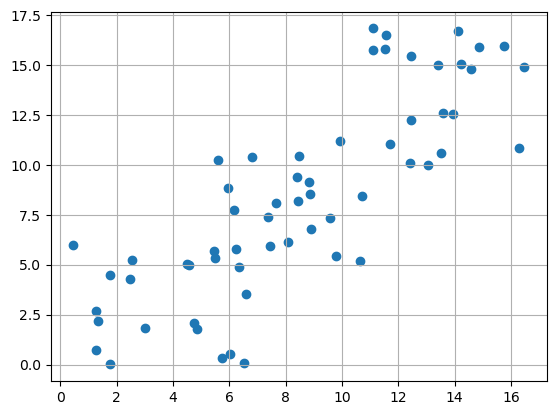

In [71]:
loaded_points = np.load('Data/k_mean_points.npy')

plt.figure()
plt.grid(True)
plt.scatter(loaded_points[:,0],loaded_points[:,1])

### 1. Specify number of clusters *K*

In [72]:
k = 3

### 2. initialize centroids

There are more techniques, on how to change initial centroids. In out case, we will take all available points and shuffle them randomly, then we will choose first *k_clusters* points as initial centroids

In [73]:
def initialize_clusters(points: np.array, k_clusters: int) -> np.array:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)
    
    :param k_clusters: The number of clusters to form
    :type k_clusters: int 


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :
    
    """
    
    np.random.shuffle(points)  # Shuffle the points to ensure randomness
    initial_clusters = points[:k_clusters, :]  # Select the first k_clusters points as initial centroids
    
    return initial_clusters

In [88]:
initialize_clusters(loaded_points, k) #To test if it works 

array([[6.00496171, 0.55857805],
       [4.55508778, 4.99697372],
       [1.27517936, 0.72152831]])

### 3. Calculate distance from centroids to all points in datasets

3.1 Fistly, create a function to calculate distance from one centroid to all points in the dataset

In [90]:
def calculate_metric(points: np.array, centroid: np.array) -> np.array:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)
    
    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """
    
    # Calculate the differences in each dimension
    diff = points - centroid
    # Square the differences and sum them across columns (for each point)
    squared_diff = np.sum(diff ** 2, axis=1)
    # Take the square root of the summed squares to get the Euclidean distance
    distances_array = np.sqrt(squared_diff)
    
    return distances_array

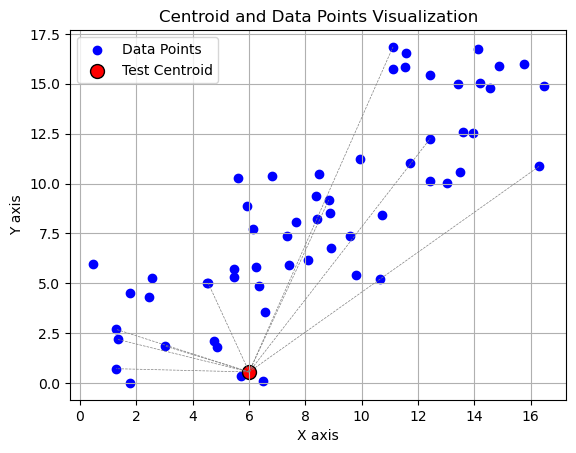

In [91]:
# Selecting a centroid for testing - for example, the first point in loaded_points
test_centroid = loaded_points[0]

# Calculate distances from this centroid to all points
distances_to_centroid = calculate_metric(loaded_points, test_centroid)

# Plotting all points
plt.scatter(loaded_points[:, 0], loaded_points[:, 1], color='blue', label='Data Points')
# Highlighting the centroid
plt.scatter(test_centroid[0], test_centroid[1], color='red', label='Test Centroid', s=100, edgecolor='black')

# Optionally, draw lines from the centroid to the first 10 points to visualize the distances. This is just a + :)
for point in loaded_points[:10]:
    plt.plot([test_centroid[0], point[0]], [test_centroid[1], point[1]], color='gray', linestyle='--', linewidth=0.5)

plt.title('Centroid and Data Points Visualization')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True)
plt.show()


3.2 Secondly, create a function to calculate distance between points and all centroids using function from 3.1

In [92]:
def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)
    

    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
   # Initialize an empty list to store distances
    distances_list = []

    # Iterate through each centroid and calculate distances to all points
    for centroid in centroids_points:
        distances = calculate_metric(points, centroid)
        distances_list.append(distances)

    # Stack the distance arrays to get a 2D array (n x k_clusters)
    distances_array = np.vstack(distances_list).T

    return distances_array

Shape of distances array: (60, 3)
Distances from the first 5 points to each centroid:
 [[0.         7.55215496 4.42497448]
 [7.55215496 0.         6.0454837 ]
 [4.42497448 6.0454837  0.        ]
 [1.36656341 8.51881391 4.35832568]
 [3.69617926 7.76386975 7.43664704]]


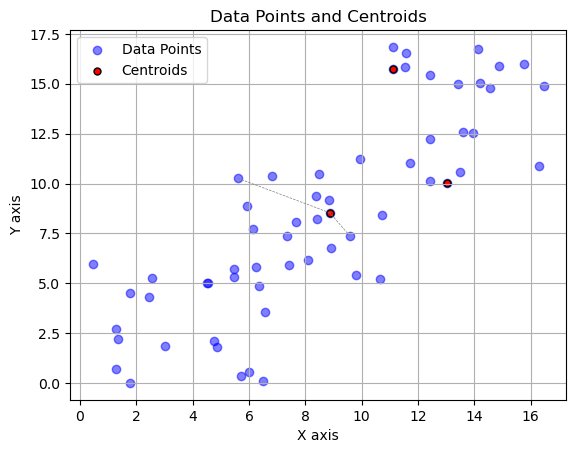

In [98]:
# let's test it :)

initial_clusters = initialize_clusters(loaded_points, k)

# Calculate the distances from each point to each centroid
all_distances = compute_distances(loaded_points, initial_clusters)

# Display the shape of the resulting distances array to ensure it's correct
print("Shape of distances array:", all_distances.shape)

# Print the distances for the first 5 points to each centroid for inspection
print("Distances from the first 5 points to each centroid:\n", all_distances[:5])

# Plotting the data points
plt.scatter(loaded_points[:, 0], loaded_points[:, 1], color='blue', label='Data Points', alpha=0.5)

# Plotting the centroids
plt.scatter(initial_clusters[:, 0], initial_clusters[:, 1], color='red', label='Centroids', s=25, edgecolor='black')

# Show connections from the first 5 points to their nearest centroid
for i, point in enumerate(loaded_points[:5]):
    nearest_centroid_idx = np.argmin(all_distances[i])
    nearest_centroid = initial_clusters[nearest_centroid_idx]
    plt.plot([point[0], nearest_centroid[0]], [point[1], nearest_centroid[1]], color='gray', linestyle='--', linewidth=0.5)

plt.title('Data Points and Centroids')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True)
plt.show()

### 4. Assign datapoints to the closest centroids

In [102]:
def assign_centroids(distances: np.array) -> np.array:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """
    
  # Find the index of the minimum distance for each point
    assigned_centroids = np.argmin(distances, axis=1).astype(np.int32)
    
    return assigned_centroids

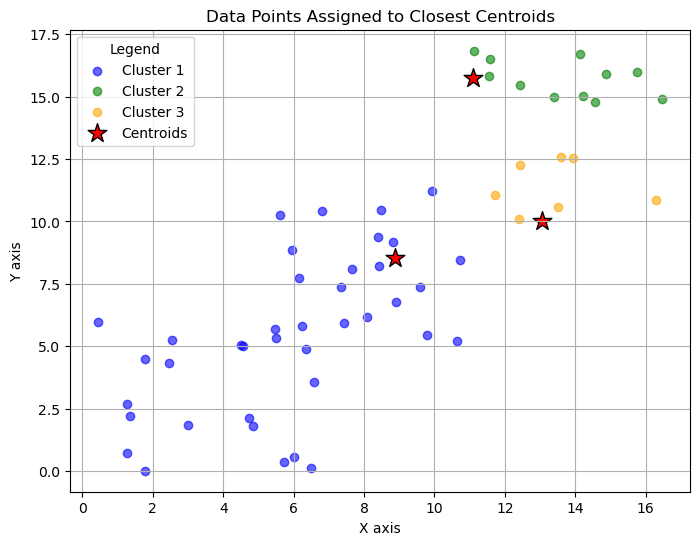

In [129]:
# Test the assign_centroids function

# Use the assign_centroids function to assign each point to the closest centroid
assigned_centroids = assign_centroids(all_distances)

# Visualize the assignment
colors = ['blue', 'green', 'orange']
plt.figure(figsize=(8, 6))
for centroid_idx, color in enumerate(colors):
    # Plot the data points that are assigned to this centroid (cluster)
    points_in_cluster = loaded_points[assigned_centroids == centroid_idx]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], color=color, alpha=0.6, label=f'Cluster {centroid_idx + 1}')

# Plot the centroids in stars :)
plt.scatter(initial_clusters[:, 0], initial_clusters[:, 1], color='red', s=200, edgecolor='black', marker='*', label='Centroids')

plt.legend(title='Legend', loc='best', scatterpoints=1)
plt.title('Data Points Assigned to Closest Centroids')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)
plt.show()



### 5. Calculate objective function

In [115]:
def calculate_objective(assigned_centroids: np.array, distances: np.array) -> np.array:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64
    
    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: onjective_function_value
    onjective_function_value: Objective function value.

    :rtype:
    onjective_function_value: float32

    
    """
    # Initialize objective function value
    objective_function_value = 0.0
    
    # Calculate the sum of squared distances for the assigned centroids
    for i, centroid_index in enumerate(assigned_centroids):
        objective_function_value += distances[i, centroid_index] ** 2

    return objective_function_value

In [120]:
#Test

# Calculate the objective function value
objective_function_value = calculate_objective(assigned_centroids, all_distances)

# Print the objective function value
print(f"Objective function value: {objective_function_value}")

Objective function value: 1525.3985578953268


Comment : The objective function value is a measure of the total squared distance between each data point and the centroid of the cluster it has been assigned to. In the context of K-means, we want to minimize this objective function value. A lower value indicates that data points are closer to their respective centroids, implying a better clustering solution. The value of 1525.3985578953268 indicates the current compactness of the clusters. To assess the performance of the clustering, this value should be compared against other clustering solutions with different initializations or a different number of K. If the value is significantly higher than alternative configurations, it may suggest that the current clustering is suboptimal and adjustments may be needed, such as choosing a different K or using a more sophisticated initialization strategy.

### 6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [123]:
def calculate_new_centroids(points: np.array, assigned_centroids: np.array, k_clusters: int) -> np.array:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    

    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """
    
    # Initialize an array to hold the new centroids
    new_centroids = np.zeros((k_clusters, points.shape[1]))

    # Compute the new centroid for each cluster
    for i in range(k_clusters):
        # Select all points that belong to the ith cluster
        cluster_points = points[assigned_centroids == i]

        # Compute the mean for each dimension
        if len(cluster_points) > 0:
            new_centroids[i] = cluster_points.mean(axis=0)
        else:
            # If a centroid has no points assigned, I can randomly reinitialize it
            new_centroids[i] = points[np.random.choice(range(points.shape[0]))]

    return new_centroids

New centroids:
 [[ 6.01268482  5.56876545]
 [13.4318396  15.73230278]
 [13.3679854  11.25254166]]


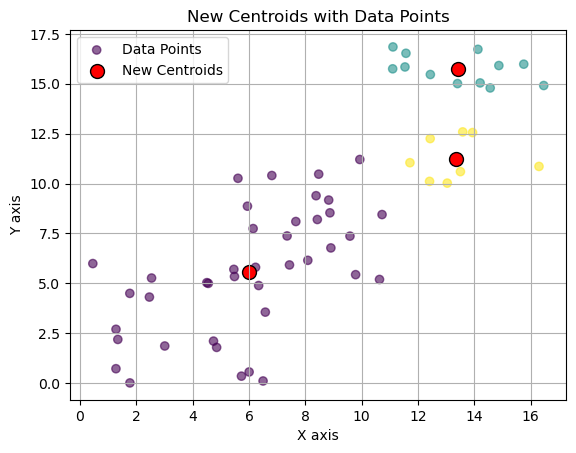

In [130]:
#test

new_centroids = calculate_new_centroids(loaded_points, assigned_centroids, k)

# Print the new centroids for inspection
print("New centroids:\n", new_centroids)

# Visualize the new centroids along with the data points
plt.scatter(loaded_points[:, 0], loaded_points[:, 1], c=assigned_centroids, alpha=0.6, cmap='viridis', label='Data Points')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], color='red', s=100, edgecolor='black', label='New Centroids')

plt.title('New Centroids with Data Points')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True)
plt.show()


###   7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

In [132]:
def fit(points: np.array, k_clusters: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_oterations:  Maximum number of iterations
    :type n_of_oterations: int

    
    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective funtion

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float
    
    """
    # Initialize centroids
    centroids = initialize_clusters(points, k_clusters)
    last_objective = np.inf
    for i in range(n_of_iterations):
        # Calculate distances from centroids to all points
        distances = compute_distances(points, centroids)
        
        # Assign points to the closest centroids
        assigned_centroids = assign_centroids(distances)
        
        # Calculate the objective function
        objective = calculate_objective(assigned_centroids, distances)
        
        # Check for convergence (if improvement is less than the error threshold)
        if last_objective - objective < error:
            print(f'Convergence reached at iteration {i}.')
            break
        last_objective = objective
        
        # Compute new centroids
        centroids = calculate_new_centroids(points, assigned_centroids, k_clusters)

    return centroids, last_objective

In [133]:
# Test

final_centroids, final_objective = fit(loaded_points, k_clusters=3, n_of_iterations=100, error=0.001)

# Print the final centroids and objective value
print("Final centroids:\n", final_centroids)
print("Final objective function value:", final_objective)



Convergence reached at iteration 4.
Final centroids:
 [[ 3.49184097  2.70762529]
 [13.24103172 13.81011385]
 [ 7.7822904   7.52348016]]
Final objective function value: 436.25198333327427


# Evaluation methods - How to determine *k*?

One of the disadvantages of using k-means is that it requires a number of centroids *k* as an input, and it is not usually that obvious, there are some methods that exist to choose the right number of centroids at the beginning. In this part of a lecture, we would describe two methods to choose the right *k* value, *Elbow method* and *Silhouette analysis*

## Elbow method

The Elbow Method is a technique used in determining the optimal number of clusters for k-means clustering. The basic idea is to plot the explained variation as a function of the number of clusters and pick the elbow of the curve as the number of clusters to use. In the picture below you can see that the best *k* value is 3

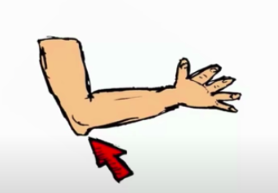 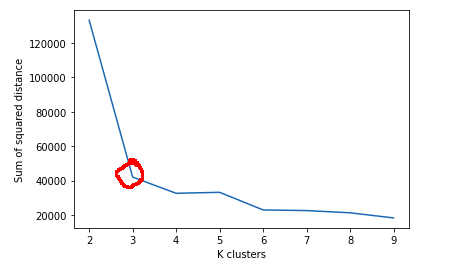

The main advantage of this method that its very simple and easy to implement, on the other hand sometimes it is not very clear where the elbow is

## Silhouette analysis

Silhouette analysis is a method to evaluate the quality of clustering results by measuring how similar each data point is to its own cluster compared to other clusters. A high silhouette score indicates that the data points in a cluster are well-separated from other clusters and that the clustering solution is good.

The silhouette score can be calculated using the following formula. This measure has a range of [-1, 1] and it is calculated for each sample in the dataset

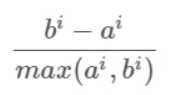

where:
 - a_i represents the average distance of that point with all other points in the same clusters
 - b_i represents the average distance of that point with all the points in the closest cluster to its cluster

if
 - is 0 –> the sample is very close to the neighboring clusters.
 - is 1 –> the sample is far away from the neighboring clusters.
 - is -1 –> the sample is assigned to the wrong clusters.

## Exercise 2 - Implementing an Elbow Method

Implementing an elbow method is simple, 
 1. Create a vector of possible *k* values
 2. Fit your data using different *k* values and save the objective function value
 3. Plot objective function values in terms of *k* values
 4. Find an elbow

In [150]:
k_all = range(2, 10)
all_objective = []

for k in k_all:
    centroids, objective = fit(loaded_points, k_clusters=k, n_of_iterations=100, error=0.001)
    all_objective.append(objective)

Convergence reached at iteration 4.
Convergence reached at iteration 5.
Convergence reached at iteration 7.
Convergence reached at iteration 8.
Convergence reached at iteration 6.
Convergence reached at iteration 3.
Convergence reached at iteration 5.
Convergence reached at iteration 8.


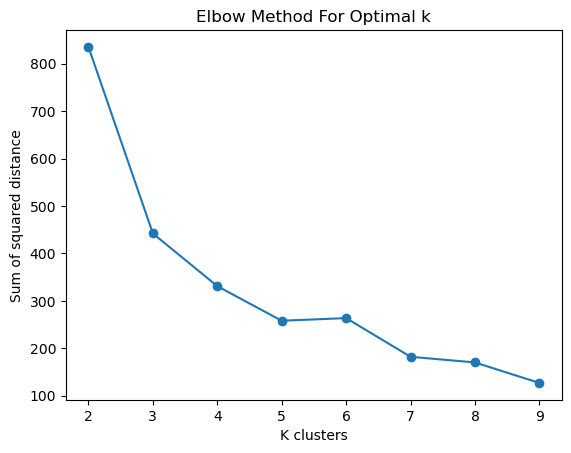

In [151]:
# Plotting the Elbow Curve
plt.figure()
plt.plot(k_all, all_objective, marker='o')
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method For Optimal k')
plt.show()

# Exercise 3 - Image Compression

In this exercise, the task would be to implement simple image compression using the k-means algorithm. You can use an image in the directory *Data\\*. This time, we will use a library that implements k-means for us - *sklearn* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. To load the image you can use *openCv* or *matplotlib* (or anything else)

### Steps

   1. Firstly reshape your image to 2D array with shape (image.width*image.height, n_of_colour_channels)
   2. Initialize the K_means algorithm, where K would be equal to the number of colors in the compressed image
   3. check cluster centroids and convert them to integers - these are your new colors (kmeans.cluster_centers_ could be useful)
   4. replace your 2D arrays colors with newly generated colors
   5. reshape your 2D array to the original image shape

Tips:
- it takes a couple of seconds to compress the attached image, you can work on your algorithm using different (smaller) image
- the implementation can be done in single function

In [136]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

### 1. load image

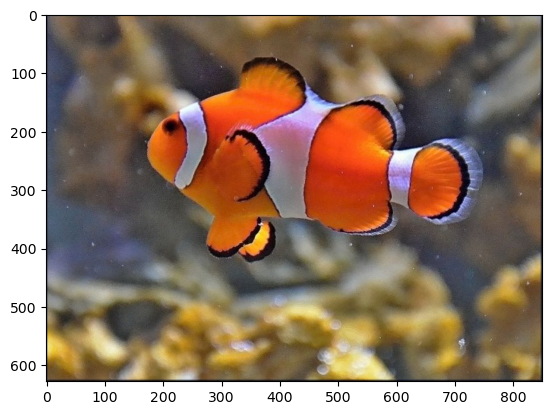

In [137]:
loaded_image = imread('Data/fish.jpg')

plt.imshow(loaded_image)
plt.show()

In [141]:
def compress_image(image: np.array, number_of_colours: int) -> np.array:
    """
    Compresses the given image by reducing the number of colours used in the image.
    
    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array 
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """
    
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)
    
    # Initialize the KMeans algorithm with the desired number of clusters (colors)
    kmeans = KMeans(n_clusters=number_of_colours)
    
    # Fit the KMeans algorithm to the pixel data
    kmeans.fit(pixels)
    
    # Replace each pixel's color with the color of the closest centroid
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
    
    # Ensure the data type is an unsigned 8-bit integer
    compressed_pixels = np.clip(compressed_pixels.astype('uint8'), 0, 255)
    
    # Reshape the compressed_pixels array to the original image's shape
    compressed_image = compressed_pixels.reshape(image.shape)
    
    return compressed_image

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


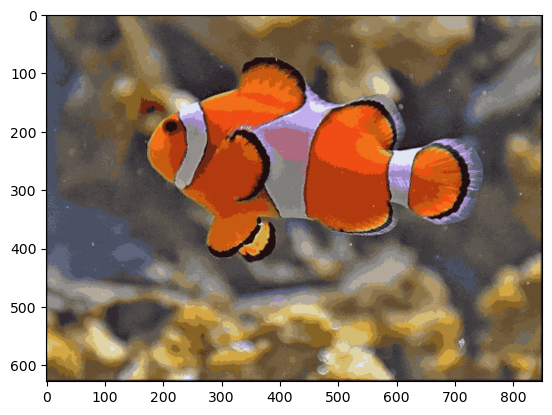

In [142]:
img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()